# Classification of DNA sequences 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# reading dataset

human_data = pd.read_table('./dataset/human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [3]:
chimp_data = pd.read_table('./dataset/chimp_data.txt')
dog_data = pd.read_table('./dataset/dog_data.txt')

### Treating DNA sequence as a “language”, otherwise known as k-mer counting

using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.



In [4]:
# defining a function to convert dna strings into k-mer words with default size = 6

def fetch_kmers(string, def_size=6):
    kmer = [string[x: x+def_size].lower() for x in range(len(string) - def_size + 1)]
    return kmer


In [5]:
# converting dataframes into kmer strings

human_data['words'] = human_data.apply(lambda x: fetch_kmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)

chimp_data['words'] = chimp_data.apply(lambda x: fetch_kmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)

dog_data['words'] = dog_data.apply(lambda x: fetch_kmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [6]:
# checking da

human_data

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...
4375,0,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,6,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."


In [7]:
# converting the lists of k-mers for each gene into string sentences of words that the count vectorizer can use.

human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values
print(human_texts[2])    
    

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [8]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

In [28]:
# converting rest of the sets as well

chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values
    
dog_text = list(dog_data['words'])
for item in range(len(dog_text)):
    dog_text[item] = ' '.join(dog_text[item])
y_dog = dog_data.iloc[:, 0].values

#### Appling Bag of Words using CountVectorizer NLP

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4,4))

X = cv.fit_transform(human_texts)

#### checking for imbalanced data if there will be then we will be using downsampling or oversampling

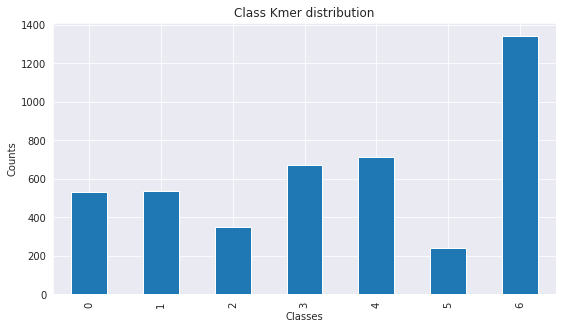

In [11]:
plt.figure(figsize=(9,5))
human_data['class'].value_counts().sort_index().plot.bar();
plt.title('Class Kmer distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show();

In [12]:
# dataset splitting
from sklearn.model_selection import train_test_split

X_t, X_test, y_t, y_test = train_test_split(X, y_data, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

### Building a Classification model that can predict DNA sequences based only on the sequence itself

In [13]:
# Naive Bias Classifier

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.3) # hyperparameter aplha will be tuned in gridsearch cv
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3)

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def get_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_scores = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1_scores

In [15]:
# Error metrics 

validation_preds = classifier.predict(X_valid)

In [16]:
def print_metrics(y_valid, y_pred):
    print("Confusion Matrix\n")
    print(pd.crosstab(pd.Series(y_valid, name='Actual'), 
                      pd.Series(y_pred, name='predicted')))
    acc, pre, rec, f1 = get_metrics(y_pred, y_valid)

    print("accuracy = {0:.3f} \nprecision = {1:.3f} \nrecall = {2:.3f} \nf1_score = {3:.3f}".format(acc, pre,rec, f1))

In [17]:
print_metrics(y_valid, validation_preds)

Confusion Matrix

predicted   0   1   2   3    4   5    6
Actual                                 
0          84   0   0   0    1   0    0
1           4  88   0   0    1   0    0
2           1   0  55   0    0   0    1
3           1   0   0  94    3   0    0
4           2   0   0   0  114   0    2
5           2   0   0   0    0  39    0
6           2   0   0   0    2   0  205
accuracy = 0.969 
precision = 0.969 
recall = 0.969 
f1_score = 0.968


### Classifier accuracy on validation is 97%

In [18]:
# Hyperparameter optimization
param_grid = {"alpha": [0.5, 0.3, 0.1, 0.05, 0.03, 0.01, 0.001]}

from sklearn.model_selection import GridSearchCV, KFold

k_fold = KFold(n_splits=10)
model = GridSearchCV(classifier, param_grid=param_grid, cv=k_fold)
model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MultinomialNB(alpha=0.3),
             param_grid={'alpha': [0.5, 0.3, 0.1, 0.05, 0.03, 0.01, 0.001]})

In [19]:
model.best_params_

{'alpha': 0.3}

In [20]:
# testing optimized classifier on test set
testset_predictions = model.best_estimator_.predict(X_test)
print_metrics(y_test, testset_predictions)

Confusion Matrix

predicted    0   1   2    3    4   5    6
Actual                                   
0          100   0   0    0    1   0    1
1            3  98   0    0    3   0    2
2            0   0  77    0    0   0    1
3            1   0   0  123    1   0    0
4            1   0   0    1  143   0    4
5            0   0   0    0    0  51    0
6            4   0   0    2    2   0  257
accuracy = 0.969 
precision = 0.970 
recall = 0.969 
f1_score = 0.969


### Naive Bias Classifier Accuracy on Test set after hyperparameter tuning in 97%

#### Trying out Decision Tree and Random forests

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [22]:
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
val_decision_tree = decision_tree.predict(X_valid)
print_metrics(y_valid, val_decision_tree)

Confusion Matrix

predicted   0   1   2   3   4   5    6
Actual                                
0          67   1   0   8   4   2    3
1           5  75   1   5   2   1    4
2           6   2  44   0   2   1    2
3          11   2   0  76   3   1    5
4          11   6   1   5  86   2    7
5           7   1   1   2   2  26    2
6          24   6   2   5   2   2  168
accuracy = 0.773 
precision = 0.776 
recall = 0.773 
f1_score = 0.767


In [24]:
val_random_forest = random_forest.predict(X_valid)
print_metrics(y_valid, val_random_forest)

Confusion Matrix

predicted   0   1   2   3   4   5    6
Actual                                
0          77   0   0   4   0   0    4
1           2  79   0   3   0   0    9
2           2   0  51   1   0   0    3
3           2   0   0  92   1   0    3
4           4   0   0   2  97   0   15
5           2   0   0   4   0  31    4
6           7   0   0   3   0   0  199
accuracy = 0.893 
precision = 0.901 
recall = 0.893 
f1_score = 0.892


### Both Classifiers ie Random Forests and Decision Tree perform very poorly in this case

## Using Naive Bayes Classifier of rest of the datasets

In [38]:
# defining a single function to complete train, validate, hyperoptimise and return test metrics

def dna_squencing_cls(preprocessed_dataset, y):
    cv = CountVectorizer(ngram_range=(4,4))
    X = cv.fit_transform(preprocessed_dataset)
    
    from sklearn.model_selection import train_test_split

    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=42)
    

    from sklearn.naive_bayes import MultinomialNB

    classifier = MultinomialNB(alpha=0.01) # hyperparameter aplha will be tuned in gridsearch cv
    classifier.fit(X_train, y_train)
    
    validation_preds = classifier.predict(X_valid)
    print('Validation Results \n\n')
    print_metrics(y_valid, validation_preds)
    print()
    print('Hyper-Optimising Results\n\n')
    
    param_grid = {"alpha": [0.5, 0.3, 0.1, 0.05, 0.03, 0.01, 0.001]}

    from sklearn.model_selection import GridSearchCV, KFold

    k_fold = KFold(n_splits=10)
    model = GridSearchCV(classifier, param_grid=param_grid, cv=k_fold)
    model.fit(X_train, y_train)
    print("Best set of parameters for model: ", model.best_estimator_, "\n\n")
    testset_predictions = model.best_estimator_.predict(X_test)
    print('Test Results')
    print_metrics(y_test, testset_predictions)

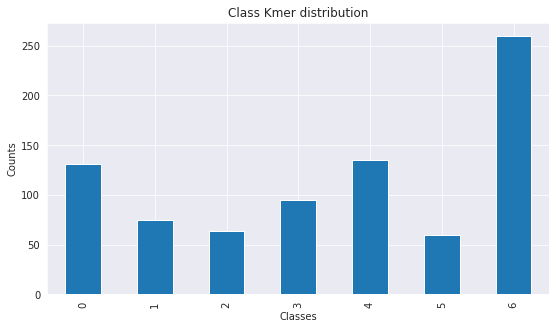

Validation Results 


Confusion Matrix

predicted   0  1  2  3  4  5   6
Actual                          
0          15  0  0  0  0  0  10
1           0  2  0  0  0  0   6
2           0  0  4  0  0  0  10
3           0  0  0  5  0  0  10
4           3  0  0  0  7  0  12
5           0  0  0  0  0  5   0
6           0  0  0  0  0  0  43
accuracy = 0.614 
precision = 0.851 
recall = 0.614 
f1_score = 0.640

Hyper-Optimising Results


Best set of parameters for model:  MultinomialNB(alpha=0.3) 


Test Results
Confusion Matrix

predicted   0   1   2   3  4  5   6
Actual                             
0          14   1   0   1  0  4   7
1           0  15   1   1  0  0   2
2           1   0  10   0  0  0   3
3           2   0   0  10  0  0   4
4           3   0   0   3  9  2   6
5           2   0   0   0  0  8   3
6           0   0   1   5  2  0  44
accuracy = 0.671 
precision = 0.710 
recall = 0.671 
f1_score = 0.676


In [39]:
plt.figure(figsize=(9,5))
dog_data['class'].value_counts().sort_index().plot.bar();
plt.title('Class Kmer distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show();
dna_squencing_cls(dog_text, y_dog)

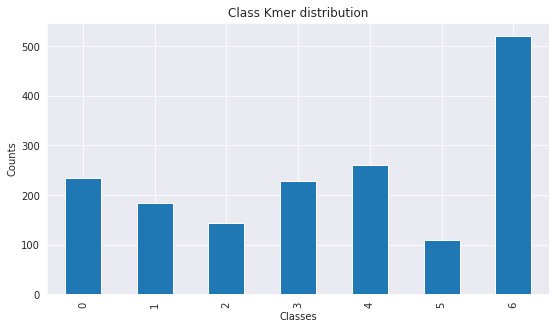

Validation Results 


Confusion Matrix

predicted   0   1   2   3   4   5   6
Actual                               
0          40   0   0   0   0   0   9
1           0  25   0   0   0   0   4
2           0   0  23   0   0   0   1
3           1   0   0  19   0   0  11
4           0   0   0   0  29   0  12
5           0   0   0   0   0  10   1
6           0   0   0   0   0   0  84
accuracy = 0.855 
precision = 0.893 
recall = 0.855 
f1_score = 0.853

Hyper-Optimising Results


Best set of parameters for model:  MultinomialNB(alpha=0.3) 


Test Results
Confusion Matrix

predicted   0   1   2   3   4   5    6
Actual                                
0          24   0   0   0   1   2    1
1           0  34   0   1   1   0    3
2           0   0  26   0   0   0    1
3           0   0   0  40   3   0    0
4           3   1   0   5  39   0    4
5           3   0   0   0   2  23    1
6           0   0   0   5   0   0  114
accuracy = 0.890 
precision = 0.896 
recall = 0.890 
f1_score = 0.891


In [40]:
plt.figure(figsize=(9,5))
chimp_data['class'].value_counts().sort_index().plot.bar();
plt.title('Class Kmer distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show();
dna_squencing_cls(chimp_texts, y_chimp)

### Classifier performs only for the DNA sequencing for Human DNA.

(Furter testing needed for chimps and dog dna sequences)